In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
tracks =pd.read_csv("datasets/fma-rock-vs-hiphop.csv")

In [3]:
echonest_metrics = pd.read_json("datasets/echonest-metrics.json", precise_float=True)


In [4]:
echonest_metrics

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [5]:
tracks

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [6]:
echo_tracks = pd.merge(echonest_metrics , tracks[["track_id","genre_top"]],on="track_id")

In [7]:
echo_tracks

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [8]:
echo_tracks.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [9]:
nums = {"genre_top": {"Hip-Hop": 0, "Rock": 1}}
echo_tracks = echo_tracks.replace(nums)
echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,1


In [10]:
echo_tracks


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,0
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,0
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,0
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,0
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,1
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,0
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,0
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,0
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,0


In [11]:
#del echo_tracks['binary_genre']

In [12]:
corr_metrics = echo_tracks.corr()


In [13]:
corr_metrics

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070,-0.004624
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841,0.097748
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165,-0.484457
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603,0.124860
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967,0.326037
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093,-0.007070
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894,-0.496495
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221,0.114571
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000,-0.246701
genre_top,-0.004624,0.097748,-0.484457,0.124860,0.326037,-0.007070,-0.496495,0.114571,-0.246701,1.000000


In [14]:
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070,-0.004624
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841,0.097748
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165,-0.484457
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603,0.124860
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967,0.326037
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093,-0.007070
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894,-0.496495
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221,0.114571
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000,-0.246701
genre_top,-0.004624,0.097748,-0.484457,0.124860,0.326037,-0.007070,-0.496495,0.114571,-0.246701,1.000000


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()


In [17]:

features = echo_tracks.drop(["genre_top","track_id"], axis=1)


labels = echo_tracks["genre_top"]


from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)



In [18]:
scaled_train_features[0] 

array([-0.19121034,  1.30442004,  0.03831594, -1.57649422, -0.06875487,
        0.37303429,  1.15397908,  0.46228696])

In [19]:
pd.DataFrame(scaled_train_features).head(5)


,0,1,2,3,4,5,6,7
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,-1.204813,1.684139,0.312852,-1.602876,1.229828,0.135130,-0.777317,0.631077
3,-0.094655,0.417927,-0.265203,-1.553079,-0.607326,2.882707,-0.364657,1.652859
4,1.361706,-0.985896,1.453323,0.979975,-0.442757,-0.364157,-1.072003,-1.573102


In [20]:
import matplotlib.pyplot as plt

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()

In [23]:
pca.fit(scaled_train_features)


PCA()

In [24]:
scaled_train_features

array([[-0.19121034,  1.30442004,  0.03831594, ...,  0.37303429,
         1.15397908,  0.46228696],
       [-0.30603598,  0.50188641,  0.78817624, ...,  2.44615517,
         0.00791367, -0.69081137],
       [-1.20481276,  1.68413943,  0.31285194, ...,  0.13513049,
        -0.77731688,  0.63107745],
       ...,
       [-1.29470431,  1.17682795,  0.13265633, ...,  0.85182206,
        -0.93541008, -0.07941825],
       [-1.13869115, -0.02253433,  0.57117905, ...,  1.40951543,
         1.31301348,  0.47513794],
       [-0.90611434,  1.10148973,  0.56322452, ...,  1.36030881,
        -1.43669053,  0.76217464]])

In [25]:
exp_variance = pca.explained_variance_ratio_

In [26]:
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

In [27]:
print("Explained variance ratio : \n{}".format(pca.explained_variance_ratio_))
print("\n")
print("Number of components = {}".format(pca.n_components_)) 

Explained variance ratio : 
[0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]


Number of components = 8


Text(0, 0.5, 'Variance #')

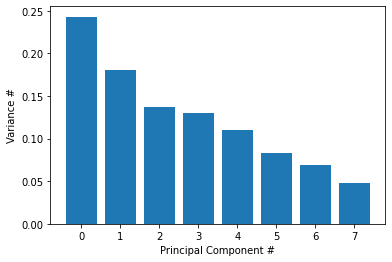

In [28]:
fig, ax = plt.subplots()
ax.bar(range(8), exp_variance)
ax.set_xlabel('Principal Component #')
ax.set_ylabel('Variance #')

In [29]:
cum_exp_variance = np.cumsum(exp_variance)


In [30]:
cum_exp_variance  # a, a+b, a+b+c, .... 

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

In [31]:
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

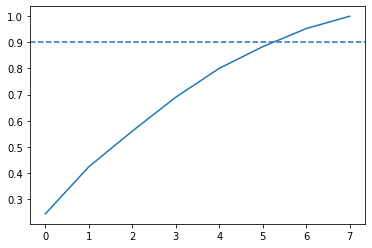

In [32]:
fig, ax = plt.subplots()
ax.plot(range(8), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
n_components = 6

In [33]:
pca = PCA(n_components, random_state=10)

In [34]:
pca.fit(scaled_train_features)

PCA(n_components=6, random_state=10)

In [35]:
pca_projection = pca.transform(scaled_train_features)


In [36]:
pca_projection

array([[ 1.59666656,  1.0500117 , -0.01778555,  0.73142514, -0.36832686,
        -0.71505324],
       [ 1.58153526,  1.07661327,  1.04346038,  0.16929959, -1.81917099,
         1.3884574 ],
       [ 2.01545627,  1.4085176 ,  0.24506524, -1.53545814,  0.62769959,
        -0.45716338],
       ...,
       [ 1.66908628,  1.84010121,  2.38294303, -2.12871589,  1.23664547,
        -0.63277253],
       [ 1.17001951,  2.03158181,  0.08689922,  0.88396123, -1.45765649,
        -0.03590123],
       [ 2.36368976,  1.15900708,  0.4473735 , -1.35198128, -0.03592518,
         0.82678557]])

In [37]:
from sklearn.metrics import classification_report

In [38]:
train_features, test_features, train_labels, test_labels =train_test_split(pca_projection,labels,random_state=10)

In [39]:
train_features

array([[-0.95266429, -0.992442  ,  1.71990072,  2.03935977, -2.12491957,
        -2.55889544],
       [-1.15095721,  0.80694253, -0.13890926, -1.34949295, -0.78328003,
         0.23619909],
       [ 1.4912024 ,  1.42512003, -0.74164056, -1.35612061,  0.01375132,
         0.0477835 ],
       ...,
       [-0.28608581, -0.28381699,  0.27840407, -0.83244213, -0.67926142,
         1.3855388 ],
       [-0.75616999,  1.26969101, -0.1924908 , -0.0593008 ,  0.42914997,
         0.09076763],
       [-2.26885604, -0.18210011,  0.17527316,  1.40597346, -0.68577802,
         0.37850736]])

In [40]:
test_features

array([[-0.7477066 , -2.08675416,  0.14799794, -0.18019823, -0.71252595,
        -0.70827976],
       [ 0.59396631, -0.36368836, -0.30630092, -0.72917289, -1.48399338,
        -1.33585952],
       [ 0.6988582 , -0.44564535,  1.78672357, -0.06545469,  3.7927897 ,
        -1.57662965],
       ...,
       [ 1.40652453,  1.6032231 , -0.89797134, -1.48262097,  0.19919263,
         0.09724914],
       [ 1.85209206,  0.29157366, -0.76340374, -1.67324775, -0.13528404,
        -0.90699355],
       [-0.24549884,  0.45866346, -1.49281207, -0.27173251,  0.2922904 ,
         0.2711684 ]])

In [41]:
train_labels

992     1
4537    1
1731    0
19      1
3096    1
       ..
1180    1
3441    1
1344    1
4623    1
1289    1
Name: genre_top, Length: 3601, dtype: int64

In [42]:
test_labels

484     1
4444    1
1766    1
4756    1
4044    1
       ..
936     1
3446    1
4323    1
4546    1
3756    1
Name: genre_top, Length: 1201, dtype: int64

In [43]:
tree = DecisionTreeClassifier(random_state=10)

In [44]:
tree.fit(train_features, train_labels)

DecisionTreeClassifier(random_state=10)

In [45]:
pred_labels_tree = tree.predict(test_features)


In [46]:
accuracy_score(y_true = test_labels,y_pred = pred_labels_tree)

0.8434637801831807

# Logical Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logreg = LogisticRegression(random_state = 10)

In [49]:
logreg.fit(train_features, train_labels)

LogisticRegression(random_state=10)

In [50]:
pred_labels_logit = logreg.predict(test_features)

In [51]:
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

In [52]:
print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)
# Let's compare both models 

Decision Tree: 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60       235
           1       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.77      0.54      0.64       235
           1       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



# Comparing Accuracy score 

In [53]:
accuracy_score(test_labels , pred_labels_tree)

0.8434637801831807

In [54]:
accuracy_score(test_labels , pred_labels_logit)

0.8784346378018318

# Checking shape of data 

In [55]:
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 0]
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 1]

In [56]:
hop_only.shape

(910, 10)

In [57]:
rock_only.shape

(3892, 10)

In [58]:
rock_only = rock_only.sample(n= hop_only.shape[0])

# Neutralised shape 

In [59]:
rock_only.shape, hop_only.shape

((910, 10), (910, 10))

### Combining data

In [60]:
rock_hop_bal = pd.concat([rock_only, hop_only])

In [61]:
rock_hop_bal

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
2264,19470,0.192928,0.353545,0.584606,8.532001e-01,0.113851,0.035297,130.500,0.417271,1
103,562,0.173623,0.463297,0.077654,9.374432e-01,0.103643,0.031336,130.277,0.436666,1
1273,8026,0.890101,0.403916,0.799648,4.547035e-01,0.155512,0.040628,128.772,0.571595,1
3255,36745,0.003108,0.372899,0.980468,8.402730e-01,0.107552,0.059531,135.243,0.058928,1
3997,52215,0.009211,0.438584,0.675048,1.885771e-01,0.178077,0.036170,120.214,0.065673,1
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,0
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,0
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,0
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,0


In [62]:
features = rock_hop_bal.drop(['genre_top', 'track_id'],axis =1)

In [63]:
labels = rock_hop_bal['genre_top']

In [64]:
pca_projection = pca.fit_transform(scaler.fit_transform(features))

In [65]:
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,stratify = labels,
                                                                                                             random_state=10)

In [66]:
# decision tree BALANCED
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

In [67]:
accuracy_score(test_labels,pred_labels_tree) #accuracy drops after balancing 

0.8

In [68]:
# Logistic regression BALANCED
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

In [69]:
accuracy_score(test_labels,pred_labels_logit) #accuracy drops after balancing 

0.8197802197802198

# Report 

In [70]:
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       227
           1       0.80      0.81      0.80       228

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       227
           1       0.81      0.84      0.82       228

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



###### By balancing data we are getting about same accuracy for rock and hip-poop

#  Cross-validation

In [71]:
from sklearn.model_selection import KFold, cross_val_score


In [72]:
kf = KFold(n_splits=15)

In [73]:
tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

In [74]:
tree_score = cross_val_score(tree, pca_projection, labels, cv = kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv = kf)

In [75]:
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.764345391320056 Logistic Regression: 0.8115702479338843


#### As we can see we got highest accuracy in Logistic regression model 

# THANK YOU